/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-means - ARI: 0.620, NMI: 0.659
Hiyerarşik Kümeleme - ARI: 0.586, NMI: 0.643
DBSCAN - ARI: 0.523, NMI: 0.615
GMM - ARI: 0.716, NMI: 0.735


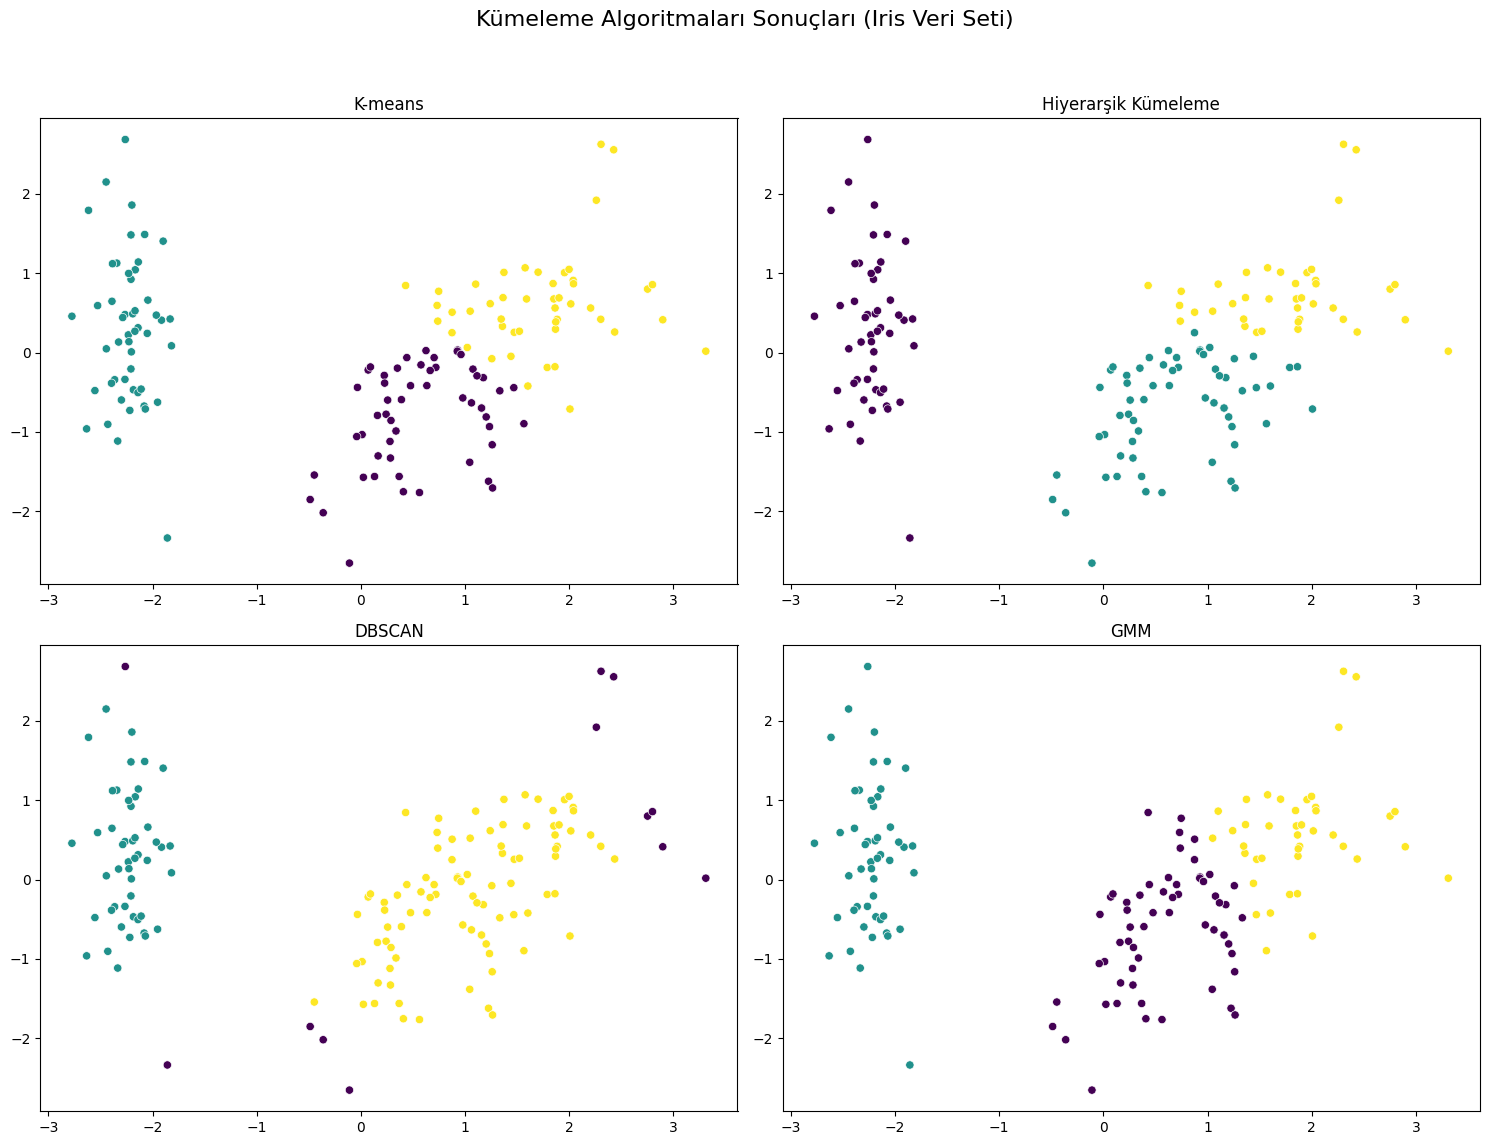

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-means
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X_pca)

# Cierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_pca)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

# Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_labels = gmm.fit_predict(X_pca)

def print_metrics(labels, true_labels, name):
    ari = adjusted_rand_score(true_labels, labels)
    nmi = normalized_mutual_info_score(true_labels, labels)
    print(f"{name} - ARI: {ari:.3f}, NMI: {nmi:.3f}")

print_metrics(kmeans_labels, y, "K-means")
print_metrics(agg_labels, y, "Hiyerarşik Kümeleme")
print_metrics(dbscan_labels, y, "DBSCAN")
print_metrics(gmm_labels, y, "GMM")

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Kümeleme Algoritmaları Sonuçları (Iris Veri Seti)', fontsize=16)

# K-means
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette="viridis", ax=axs[0, 0], legend=None)
axs[0, 0].set_title('K-means')

# Hierarchical Clustering
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agg_labels, palette="viridis", ax=axs[0, 1], legend=None)
axs[0, 1].set_title('Hiyerarşik Kümeleme')

# DBSCAN
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette="viridis", ax=axs[1, 0], legend=None)
axs[1, 0].set_title('DBSCAN')

# GMM
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, palette="viridis", ax=axs[1, 1], legend=None)
axs[1, 1].set_title('GMM')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
